In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import pycountry
import seaborn as sns
import numpy as np

ocde = [
    'Australia',
    'Austria',
    'Belgium',
    'Canada',
    'Chile',
    'Czechia',
    'Denmark',
    'Estonia',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'South Korea',
    'Luxembourg',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Slovakia',
    'Slovenia',
    'Spain',
    'Sweden',
    'Switzerland',
    'Türkiye',
    'United Kingdom',
    'United States'
]

In [21]:
fb = pd.read_parquet('../data/analyzed/fb/FB_K^4_X_by_country.parquet')
ld = pd.read_parquet('../data/analyzed/ld/LD_K^4_X_by_country.parquet')
tw = pd.read_parquet('../data/analyzed/tw/TW_K^4_X_by_country.parquet')

In [22]:
fb = fb.reset_index(drop=True)
ld = ld.reset_index(drop=True)
tw = tw.reset_index(drop=True)

In [23]:
ld

,country,K^4_90,K^4_95,K^4_99,RK^4_90,RK^4_95,RK^4_99
0,LI,126,103,58,0.647,0.529,0.298
1,FJ,440,178,78,0.595,0.241,0.106
2,RO,7800,4400,1700,0.515,0.290,0.112
3,TO,122,79,46,0.864,0.559,0.326
4,PF,180,129,57,0.555,0.397,0.176
...,...,...,...,...,...,...,...
197,NL,32000,20000,7700,0.492,0.307,0.118
198,AU,55000,27000,10000,0.614,0.302,0.112
199,CA,90000,38000,16000,0.651,0.275,0.116
200,GB,130000,80000,27000,0.544,0.335,0.113


In [24]:
temp = pd.merge(fb,ld, on='country', suffixes=('_mt', '_ld'))


exclude_column = 'country'

tw = tw.rename(columns=lambda col: col + '_tw' if col != exclude_column else col)

platforms_merged = pd.merge(temp,tw, on='country')

In [25]:
platforms_merged
platforms_merged.rename(columns = {'K^4_90_mt': r'$K^4_{90} MT$', 'K^4_90_ld': r'$K^4_{90} LD$', 'K^4_90_tw': r'$K^4_{90} TW$',
                                    'K^4_95_mt': r'$K^4_{95} MT$', 'K^4_95_ld': r'$K^4_{95} LD$', 'K^4_95_tw': r'$K^4_{95} TW$',
                                    'K^4_99_mt': r'$K^4_{99} MT$', 'K^4_99_ld': r'$K^4_{99} LD$', 'K^4_99_tw': r'$K^4_{99} TW$'
                                    }, inplace=True)

platforms_merged.rename(columns = {'RK^4_90_mt': r'$RK^4_{90} MT$', 'RK^4_90_ld': r'$RK^4_{90} LD$', 'RK^4_90_tw': r'$RK^4_{90} TW$',
                                    'RK^4_95_mt': r'$RK^4_{95} MT$', 'RK^4_95_ld': r'$RK^4_{95} LD$', 'RK^4_95_tw': r'$RK^4_{95} TW$',
                                    'RK^4_99_mt': r'$RK^4_{99} MT$', 'RK^4_99_ld': r'$RK^4_{99} LD$', 'RK^4_99_tw': r'$RK^4_{99} TW$'
                                    }, inplace=True)

In [26]:
platforms_merged = platforms_merged.reindex(sorted(platforms_merged.columns), axis=1)
platforms_merged

,$K^4_{90} LD$,$K^4_{90} MT$,$K^4_{90} TW$,$K^4_{95} LD$,$K^4_{95} MT$,$K^4_{95} TW$,$K^4_{99} LD$,$K^4_{99} MT$,$K^4_{99} TW$,$RK^4_{90} LD$,$RK^4_{90} MT$,$RK^4_{90} TW$,$RK^4_{95} LD$,$RK^4_{95} MT$,$RK^4_{95} TW$,$RK^4_{99} LD$,$RK^4_{99} MT$,$RK^4_{99} TW$,country
0,162,68,1402,123,49,823,54,21,275,0.511,0.032,2.494,0.388,0.023,1.464,0.170,0.010,0.489,AD
1,36000,8300,71001,13000,3000,49640,4600,798,16908,0.828,0.085,2.171,0.299,0.031,1.518,0.106,0.008,0.517,AE
2,1100,7300,5483,420,1900,3910,169,497,675,0.639,0.178,1.785,0.244,0.046,1.273,0.098,0.012,0.220,AF
3,143,74,828,108,51,727,50,22,221,0.649,0.033,1.623,0.490,0.023,1.425,0.227,0.010,0.433,AG
4,910,989,6875,490,887,6525,131,68,937,0.585,0.074,3.187,0.315,0.066,3.025,0.084,0.005,0.434,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,800,4900,38503,282,1100,19097,135,497,7099,0.624,0.125,2.732,0.220,0.028,1.355,0.105,0.013,0.504,YE
187,106,73,361,92,51,306,37,23,207,0.651,0.031,2.024,0.565,0.022,1.715,0.227,0.010,1.160,YT
188,31000,21300,115934,17000,8400,65666,6500,1600,23114,0.566,0.082,3.004,0.310,0.032,1.702,0.119,0.006,0.599,ZA
189,1800,2500,3900,930,989,1700,280,497,553,0.592,0.069,2.653,0.306,0.027,1.157,0.092,0.014,0.376,ZM


/var/folders/z5/ytx34jnj6rq1pmddzy83mx3w0000gn/T/ipykernel_30019/369387039.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


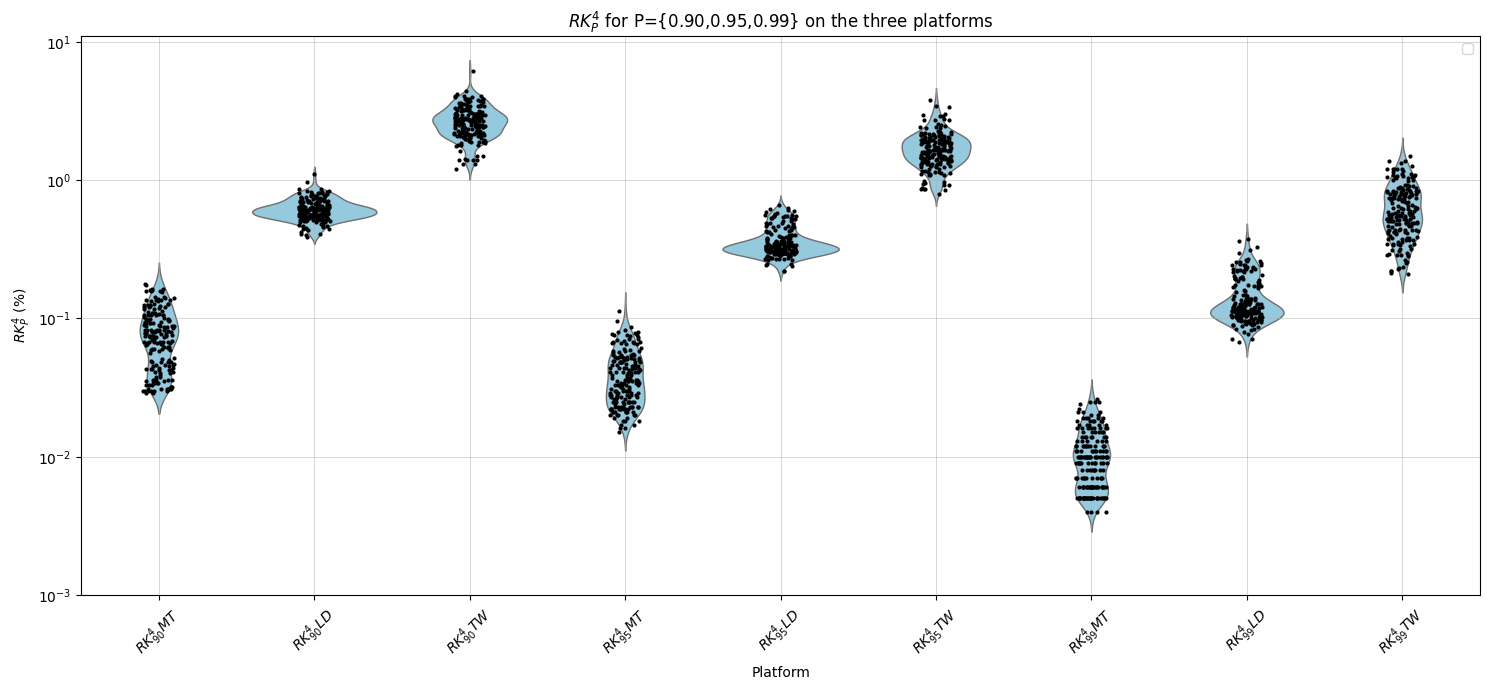

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


columns = [r'$RK^4_{90} MT$', r'$RK^4_{90} LD$', r'$RK^4_{90} TW$',
          r'$RK^4_{95} MT$', r'$RK^4_{95} LD$', r'$RK^4_{95} TW$',
          r'$RK^4_{99} MT$', r'$RK^4_{99} LD$', r'$RK^4_{99} TW$']

data_melted = platforms_merged.melt(value_vars=columns, var_name='Platform', value_name='Value')


data_melted['LogValue'] = np.log10(data_melted['Value'])


median_values = data_melted.groupby('Platform')['LogValue'].median()


plt.figure(figsize=(15, 7))


sns.violinplot(data=data_melted, x='Platform', y='LogValue', inner=None, color='skyblue', linewidth=1)


sns.stripplot(data=data_melted, x='Platform', y='LogValue', jitter=True, color='black', size=3)



log_ticks = np.arange(np.floor(data_melted['LogValue'].min()), 
                      np.ceil(data_melted['LogValue'].max()) + 1)
plt.yticks(log_ticks, [f"$10^{{{int(tick)}}}$" for tick in log_ticks])


plt.ylabel('$RK^4_{P}$ (%)')
plt.title('$RK^4_{P}$ for P={0.90,0.95,0.99} on the three platforms')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)


plt.legend(loc='upper right')



plt.show()


In [28]:
countries_ocde_a2 = pd.DataFrame(pd.DataFrame(ocde,columns=['country'])['country'].apply(lambda x: pycountry.countries.lookup(x).alpha_2))

df_ocde = platforms_merged[platforms_merged['country'].isin(countries_ocde_a2['country'])].copy()

In [29]:
latex_table=df_ocde.assign(country=df_ocde["country"].apply(lambda x: pycountry.countries.get(alpha_2=x).name)).sort_values(r'$RK^4_{90} TW$', ascending=True)[['country',r'$K^4_{90} MT$', r'$K^4_{90} LD$',r'$K^4_{90} TW$',  r'$RK^4_{90} MT$', r'$RK^4_{90} LD$',r'$RK^4_{90} TW$']].to_latex(index=False,float_format="%.4f",escape=False)
print(latex_table)

\begin{tabular}{lrrrrrr}
\toprule
country & $K^4_{90} MT$ & $K^4_{90} LD$ & $K^4_{90} TW$ & $RK^4_{90} MT$ & $RK^4_{90} LD$ & $RK^4_{90} TW$ \\
\midrule
Australia & 12400 & 55000 & 130483 & 0.0880 & 0.6140 & 2.0990 \\
Ireland & 1100 & 9300 & 40001 & 0.0390 & 0.5560 & 2.1300 \\
Denmark & 2700 & 11000 & 22668 & 0.0810 & 0.5600 & 2.1580 \\
Iceland & 748 & 249 & 3145 & 0.1730 & 0.4680 & 2.1660 \\
Japan & 23400 & 6400 & 1947139 & 0.1170 & 0.5970 & 2.4310 \\
Switzerland & 1600 & 15000 & 39066 & 0.0460 & 0.5840 & 2.4920 \\
New Zealand & 1100 & 9800 & 22625 & 0.0360 & 0.6320 & 2.5250 \\
Norway & 2000 & 7700 & 33518 & 0.0670 & 0.6110 & 2.5510 \\
United Kingdom & 33300 & 130000 & 643711 & 0.0980 & 0.5440 & 2.5590 \\
Finland & 1200 & 3900 & 46643 & 0.0500 & 0.5120 & 2.6160 \\
United States & 183400 & 850000 & 2813271 & 0.1090 & 0.6260 & 2.6720 \\
Austria & 2000 & 6800 & 36377 & 0.0560 & 0.5440 & 2.6790 \\
Mexico & 97100 & 66000 & 481176 & 0.1050 & 0.5710 & 2.6910 \\
Netherlands & 6800 & 32000 & 2

In [30]:
df_ocde_pivot_countries = df_ocde.pivot_table(index='country', values=[r'$K^4_{90} MT$', r'$K^4_{90} LD$', r'$K^4_{90} TW$']).T

In [31]:
df_ocde_pivot_platforms= df_ocde[[r'$K^4_{90} MT$', r'$K^4_{90} LD$', r'$K^4_{90} TW$']]
correlation_matrix = df_ocde_pivot_platforms.corr(method='spearman')

correlation_matrix

,$K^4_{90} MT$,$K^4_{90} LD$,$K^4_{90} TW$
$K^4_{90} MT$,1.000000,0.846969,0.940097
$K^4_{90} LD$,0.846969,1.000000,0.827871
$K^4_{90} TW$,0.940097,0.827871,1.000000


/var/folders/z5/ytx34jnj6rq1pmddzy83mx3w0000gn/T/ipykernel_30019/1517994675.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


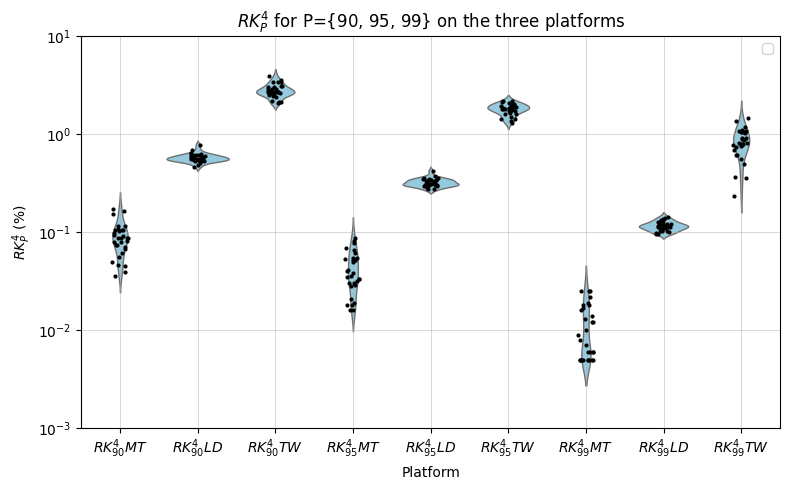

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


columns = [r'$RK^4_{90} MT$', r'$RK^4_{90} LD$', r'$RK^4_{90} TW$',
          r'$RK^4_{95} MT$', r'$RK^4_{95} LD$', r'$RK^4_{95} TW$',
          r'$RK^4_{99} MT$', r'$RK^4_{99} LD$', r'$RK^4_{99} TW$']
data_melted = df_ocde.melt(value_vars=columns, var_name='Platform', value_name='Value')


data_melted['LogValue'] = np.log10(data_melted['Value'])


median_values = data_melted.groupby('Platform')['LogValue'].median()


plt.figure(figsize=(8, 5))


sns.violinplot(data=data_melted, x='Platform', y='LogValue', inner=None, color='skyblue', linewidth=1)


sns.stripplot(data=data_melted, x='Platform', y='LogValue', jitter=True, color='black', size=3)



log_ticks = np.arange(np.floor(data_melted['LogValue'].min()), 
                      np.ceil(data_melted['LogValue'].max()) + 1)
plt.yticks(log_ticks, [f"$10^{{{int(tick)}}}$" for tick in log_ticks])


plt.ylabel(r'$RK^4_{P}$ (%)')
plt.title('$RK^4_{P}$ for P={90, 95, 99} on the three platforms')

plt.tight_layout()
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7)


plt.legend(loc='upper right')



plt.savefig("Figure_2.png", dpi=300, bbox_inches='tight')
plt.show()


In [33]:
df_ocde_partial = df_ocde[[r'$RK^4_{90} MT$', r'$RK^4_{90} LD$', r'$RK^4_{90} TW$','country']]
df_ocde_partial = df_ocde_partial.assign(**{'increment-MT-LD': df_ocde_partial[r'$RK^4_{90} LD$'] / df_ocde_partial[r'$RK^4_{90} MT$']})
df_ocde_partial['increment-MT-TW'] = df_ocde_partial[r'$RK^4_{90} TW$'] / df_ocde_partial[r'$RK^4_{90} MT$']
df_ocde_partial['increment-LD-TW'] = df_ocde_partial[r'$RK^4_{90} TW$'] / df_ocde_partial[r'$RK^4_{90} LD$']

In [34]:
print(df_ocde_partial['increment-MT-LD'].min(),df_ocde_partial['increment-MT-LD'].max(),df_ocde_partial['increment-MT-LD'].mean(),df_ocde_partial['increment-MT-LD'].median(), df_ocde_partial['increment-MT-LD'].std())

2.7052023121387285 17.555555555555557 7.577700618119797 6.925531914893617 3.288266835854827


In [35]:
print(df_ocde_partial['increment-MT-TW'].min(),df_ocde_partial['increment-MT-TW'].max(),df_ocde_partial['increment-MT-TW'].mean(),df_ocde_partial['increment-MT-TW'].median(),df_ocde_partial['increment-MT-TW'].std())

12.520231213872833 70.13888888888889 35.951890400268795 33.41379310344828 13.225926575046843


In [36]:
print(df_ocde_partial['increment-LD-TW'].min(),df_ocde_partial['increment-LD-TW'].max(),df_ocde_partial['increment-LD-TW'].mean(),df_ocde_partial['increment-LD-TW'].median(), df_ocde_partial['increment-LD-TW'].std())

3.4185667752443 6.848537005163512 4.893508667635895 4.712784588441331 0.8454920940125638


In [37]:
df_ocde_partial

,$RK^4_{90} MT$,$RK^4_{90} LD$,$RK^4_{90} TW$,country,increment-MT-LD,increment-MT-TW,increment-LD-TW
9,0.056,0.544,2.679,AT,9.714286,47.839286,4.924632
10,0.088,0.614,2.099,AU,6.977273,23.852273,3.418567
16,0.079,0.540,2.718,BE,6.835443,34.405063,5.033333
29,0.094,0.651,3.057,CA,6.925532,32.521277,4.695853
31,0.046,0.584,2.492,CH,12.695652,54.173913,4.267123
33,0.087,0.698,2.907,CL,8.022989,33.413793,4.164756
39,0.102,0.609,3.061,DE,5.970588,30.009804,5.026273
41,0.081,0.560,2.158,DK,6.913580,26.641975,3.853571
46,0.116,0.581,3.979,EE,5.008621,34.301724,6.848537
49,0.105,0.563,2.727,ES,5.361905,25.971429,4.843694
